# 作業

以正確的副檔名下載網頁中的圖片
範例網頁:https://www.ptt.cc/bbs/Beauty/M.1556291059.A.75A.html

Note：因為 PTT 會詢問「是否滿 18 歲」，這邊可以用 cookies 繞過

`requests.get(URL, cookies={'over18': '1'}`


In [4]:
import requests
import os
from PIL import Image
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
# from PIL import Image

In [5]:
url = 'https://www.ptt.cc/bbs/Beauty/M.1556291059.A.75A.html'
resp = requests.get(url, cookies={'over18': '1'})
soup = BeautifulSoup(resp.text)

Save image downloads/Cgb5oo1.jpeg
Save image downloads/MgjHY4f.jpeg
Save image downloads/yeoRtAs.jpeg
Save image downloads/wsauNEW.jpeg
Save image downloads/IjiETcs.jpeg


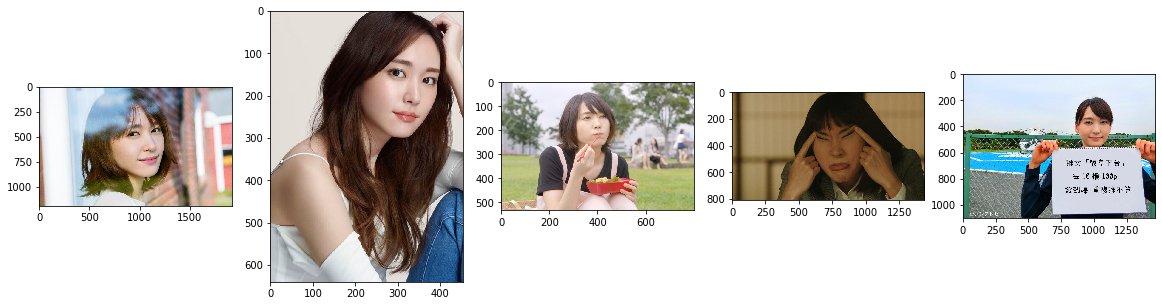

In [9]:
# 決定要儲存的資料夾
output_dir = 'downloads'
# 假如資料夾不存在就新增一個資料夾
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
plt.figure(num='astronaut',figsize=(20,20))  #创建一个名为astronaut的窗口,并设置大小
i = 1
# 定位所有圖片的 tag
image_tags =  soup.find(id='main-content').findChildren('a', recursive=False)
for img_tag in image_tags:
    # 取得所有圖片在第三方服務的 id
    if 'imgur' not in img_tag['href']:
        continue
    img_id = img_tag['href'].split('/')[-1]

    # 組合圖片而非網站的網址
    img_url = 'https://i.imgur.com/{}.jpg'.format(img_id)

    # 對圖片送出請求
    with requests.get(img_url, stream=True) as r:
        r.raise_for_status()
        # 檢查圖片副檔名
        img = Image.open(r.raw)
        img_savename = '{outdir}/{img_id}.{img_ext}'.format(
            outdir=output_dir, img_id=img_id, img_ext=img.format.lower())
        img.save(img_savename)
        print('Save image {}'.format(img_savename))
        
        plt.subplot(1,5,i)
        plt.imshow(img) 
        i = i + 1